In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'eb7fa294-0e22-44da-868d-957923d52b81',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

D:\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.925165e+07,1.925165e+07,NaN,1,NaN,NaN,None,2023-01-04T03:45:00.000Z,16809.093542,1.519262e+10,23.4866,0.418795,0.692862,0.942578,-2.362671,-21.467289,-17.487093,3.236028e+11,39.5670,3.529910e+11,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
1,1027,Ethereum,ETH,ethereum,6331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-04T03:45:00.000Z,1246.157997,4.512322e+09,19.6002,1.378858,2.551570,4.090012,-3.629398,-24.290835,-9.266126,1.524972e+11,18.6405,1.524972e+11,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
2,825,Tether,USDT,tether,45738,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.626371e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.999768,2.057888e+10,26.8906,0.001888,-0.001760,-0.012147,-0.036259,-0.035701,-0.033695,6.624837e+10,8.1029,7.312483e+10,None,2023-01-04T03:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-04 03:47:51.189169
3,3408,USD Coin,USDC,usd-coin,9391,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.419277e+10,4.419277e+10,NaN,4,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.999994,2.190384e+09,37.8616,-0.008053,-0.001092,0.005428,-0.000377,0.001280,0.006942,4.419252e+10,5.4019,4.419252e+10,None,2023-01-04T03:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-04 03:47:51.189169
4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599642e+08,1.599800e+08,NaN,5,NaN,NaN,None,2023-01-04T03:45:00.000Z,256.453074,5.114893e+08,54.3095,3.216878,4.340607,4.606660,-13.112155,-27.806235,-13.528624,4.102331e+10,5.0176,5.129061e+10,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.056377e+10,9.998917e+10,NaN,6,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.350002,7.857681e+08,-25.8285,0.785081,2.024090,-2.788380,-10.860581,-29.454256,-29.440809,1.769740e+10,2.1639,3.500016e+10,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
6,4687,Binance USD,BUSD,binance-usd,5948,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.638120e+10,1.638120e+10,NaN,7,NaN,NaN,None,2023-01-04T03:45:00.000Z,1.000230,4.425811e+09,27.0731,0.029029,0.028944,0.079586,0.009827,-0.023938,0.009371,1.638497e+10,2.0028,1.638497e+10,None,2023-01-04T03:45:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-04 03:47:51.189169
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.072048,3.268233e+08,-16.7992,0.791823,0.662889,0.600874,-30.862063,-41.820740,8.179506,9.558600e+09,1.1691,9.558600e+09,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
8,2010,Cardano,ADA,cardano,626,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.452289e+10,3.528563e+10,NaN,9,NaN,NaN

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'eb7fa294-0e22-44da-868d-957923d52b81',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'D:\Python file CSV\API.csv'):
        df.to_csv(r'D:\Python file CSV\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Python file CSV\API.csv', mode='a', header=False)
        

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60) #Sleep for 1 minute
exit()    

D:\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\vinht\AppData\Local\Temp\ipykernel_20424\3985086198.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API runner completed


KeyboardInterrupt: 

In [7]:
df3 = pd.read_csv(r'D:\Python file CSV\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.925165e+07,1.925165e+07,NaN,1,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,16716.867449,1.407723e+10,15.6378,0.122624,0.169346,0.118512,-3.200787,-21.797404,-18.033258,3.218273e+11,39.7233,3.510542e+11,NaN,2023-01-04T02:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 02:15:46.128457
1,1,1027,Ethereum,ETH,ethereum,6331,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,1225.659623,3.654422e+09,-2.1491,0.684406,0.934477,1.316918,-5.044672,-25.893955,-11.100086,1.499887e+11,18.5170,1.499887e+11,NaN,2023-01-04T02:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 02:15:46.128457
2,2,825,Tether,USDT,tether,45736,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.626371e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,0.999757,1.879535e+10,17.1023,-0.000452,-0.002430,-0.011627,-0.036569,-0.031892,-0.039230,6.624764e+10,8.1802,7.312402e+10,NaN,2023-01-04T02:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-04 02:15:46.128457
3,3,3408,USD Coin,USDC,usd-coin,9390,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.419277e+10,4.419277e+10,NaN,4,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,1.000076,2.066895e+09,33.9598,0.002347,0.010449,0.017570,-0.006475,-0.003118,0.004953,4.419614e+10,5.4563,4.419614e+10,NaN,2023-01-04T02:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-04 02:15:46.128457
4,4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.599642e+08,1.599800e+08,NaN,5,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,246.686874,3.826803e+08,14.4862,0.053320,0.477376,0.199075,-16.757411,-30.359999,-16.897197,3.946107e+10,4.8726,4.933737e+10,NaN,2023-01-04T02:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 02:15:46.128457
5,5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.056377e+10,9.998917e+10,NaN,6,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,0.345590,8.008733e+08,-23.5671,0.151322,0.218810,-5.094087,-11.385471,-30.920365,-30.331865,1.747435e+10,2.1569,3.455903e+10,NaN,2023-01-04T02:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 02:15:46.128457
6,6,4687,Binance USD,BUSD,binance-usd,5947,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.638120e+10,1.638120e+10,NaN,7,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,1.000124,4.082049e+09,19.0251,-0.015593,-0.015217,-0.006986,0.002634,-0.014716,0.090889,1.638322e+10,2.0226,1.638322e+10,NaN,2023-01-04T02:14:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-01-04 02:15:46.128457
7,7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2023-01-04T02:14:00.000Z,0.071337,2.997474e+08,-23.4047,0.851160,-0.249057,-2.202869,-31.608577,-42.770111,9.462564,9.464395e+09,1.1687,9.464395e+09,NaN,2023-01-04T02:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 02:15:46.128457
8,8,2010,Cardano,ADA,cardano,626,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.452289e+10,3.52856

In [8]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9914,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19251650.00000,19251650.00000,NaN,1,NaN,NaN,None,2023-01-04T03:45:00.000Z,16809.09354,15192619881.43726,23.48660,0.41879,0.69286,0.94258,-2.36267,-21.46729,-17.48709,323602785678.87598,39.56700,352990964372.21997,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
1,1027,Ethereum,ETH,ethereum,6331,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-01-04T03:45:00.000Z,1246.15800,4512322160.71511,19.60020,1.37886,2.55157,4.09001,-3.62940,-24.29084,-9.26613,152497172002.67889,18.64050,152497172002.67999,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
2,825,Tether,USDT,tether,45738,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66263713430.64680,73141766321.23428,NaN,3,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.99977,20578883057.05284,26.89060,0.00189,-0.00176,-0.01215,-0.03626,-0.03570,-0.03370,66248366567.64883,8.10290,73124826481.78000,None,2023-01-04T03:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-04 03:47:51.189169
3,3408,USD Coin,USDC,usd-coin,9391,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,44192768059.84209,44192768059.84209,NaN,4,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.99999,2190384140.03545,37.86160,-0.00805,-0.00109,0.00543,-0.00038,0.00128,0.00694,44192522324.05704,5.40190,44192522324.06000,None,2023-01-04T03:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-04 03:47:51.189169
4,1839,BNB,BNB,bnb,1164,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159964206.63714,159979963.59043,NaN,5,NaN,NaN,None,2023-01-04T03:45:00.000Z,256.45307,511489334.81435,54.30950,3.21688,4.34061,4.60666,-13.11215,-27.80623,-13.52862,41023312578.34978,5.01760,51290614870.37000,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
5,52,XRP,XRP,xrp,871,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50563767827.00000,99989171756.00000,NaN,6,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.35000,785768145.79220,-25.82850,0.78508,2.02409,-2.78838,-10.86058,-29.45426,-29.44081,17697401794.83671,2.16390,35000164258.70000,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189169
6,4687,Binance USD,BUSD,binance-usd,5948,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16381199632.10406,16381199632.10406,NaN,7,NaN,NaN,None,2023-01-04T03:45:00.000Z,1.00023,4425810554.18381,27.07310,0.02903,0.02894,0.07959,0.00983,-0.02394,0.00937,16384967704.85290,2.00280,16384967704.85000,None,2023-01-04T03:45:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-01-04 03:47:51.189169
7,74,Dogecoin,DOGE,dogecoin,629,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2023-01-04T03:45:00.000Z,0.07205,326823307.18780,-16.79920,0.79182,0.66289,0.60087,-30.86206,-41.82074,8.17951,9558599623.04710,1.16910,9558599623.05000,None,2023-01-04T03:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-04 03:47:51.189

In [10]:
# Now let's look at the coin trends over time
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.41879,0.69286,0.94258,-2.36267,-21.46729,-17.48709
Ethereum,1.37886,2.55157,4.09001,-3.62940,-24.29084,-9.26613
Tether,0.00189,-0.00176,-0.01215,-0.03626,-0.03570,-0.03370
USD Coin,-0.00805,-0.00109,0.00543,-0.00038,0.00128,0.00694
BNB,3.21688,4.34061,4.60666,-13.11215,-27.80623,-13.52862
XRP,0.78508,2.02409,-2.78838,-10.86058,-29.45426,-29.44081
Binance USD,0.02903,0.02894,0.07959,0.00983,-0.02394,0.00937
Dogecoin,0.79182,0.66289,0.60087,-30.86206,-41.82074,8.17951
Cardano,3.02948,4.39843,3.36536,-18.44579,-38.06839,-39.21006


In [11]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      0.41879
             quote.USD.percent_change_24h     0.69286
             quote.USD.percent_change_7d      0.94258
             quote.USD.percent_change_30d    -2.36267
             quote.USD.percent_change_60d   -21.46729
             quote.USD.percent_change_90d   -17.48709
Ethereum     quote.USD.percent_change_1h      1.37886
             quote.USD.percent_change_24h     2.55157
             quote.USD.percent_change_7d      4.09001
             quote.USD.percent_change_30d    -3.62940
             quote.USD.percent_change_60d   -24.29084
             quote.USD.percent_change_90d    -9.26613
Tether       quote.USD.percent_change_1h      0.00189
             quote.USD.percent_change_24h    -0.00176
             quote.USD.percent_change_7d     -0.01215
             quote.USD.percent_change_30d    -0.03626
             quote.USD.percent_change_60d    -0.03570
             quote.USD.percent_change_90

In [12]:
type(df5)

pandas.core.series.Series

In [13]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.41879
            quote.USD.percent_change_24h   0.69286
            quote.USD.percent_change_7d    0.94258
            quote.USD.percent_change_30d  -2.36267
            quote.USD.percent_change_60d -21.46729
            quote.USD.percent_change_90d -17.48709
Ethereum    quote.USD.percent_change_1h    1.37886
            quote.USD.percent_change_24h   2.55157
            quote.USD.percent_change_7d    4.09001
            quote.USD.percent_change_30d  -3.62940
            quote.USD.percent_change_60d -24.29084
            quote.USD.percent_change_90d  -9.26613
Tether      quote.USD.percent_change_1h    0.00189
            quote.USD.percent_change_24h  -0.00176
            quote.USD.percent_change_7d   -0.01215
            quote.USD.percent_change_30d  -0.03626
            quote.USD.percent_change_60d  -0.03570
            quote.USD.percent_change_90d  -0.03370
USD Coin    quote.USD.percent_change_1h   -0.00805
            quote.USD.percent_change_24h  -0.00109
            quote.USD.percent_change_7d    0.00543
            quote.USD.percent_change_30d  -0.00038
            quote.USD.percent_change_60d   0.00128
            quote.USD.percent_change_90d   0.00694
BNB         quote.USD.percent_change_1h    3.21688
            quote.USD.percent_change_24h   4.34061
            quote.USD.percent_change_7d    4.60666
            quote.USD.percent_change_30d -13.11215
            quote.USD.percent_change_60d -27.80623
            quote.USD.percent_change_90d -13.52862
XRP         quote.USD.percent_change_1h    0.78508
            quote.USD.percent_change_24h   2.02409
            quote.USD.percent_change_7d   -2.78838
            quote.USD.percent_change_30d -10.86058
            quote.USD.percent_change_60d -29.45426
            quote.USD.percent_change_90d -29.44081
Binance USD quote.USD.percent_change_1h    0.02903
            quote.USD.percent_change_24h   0.02894
            quote.USD.percent_change_7d    0.07959
            quote.USD.percent_change_30d   0.00983
            quote.USD.percent_change_60d  -0.02394
            quote.USD.percent_change_90d   0.00937
Dogecoin    quote.USD.percent_change_1h    0.79182
            quote.USD.percent_change_24h   0.66289
            quote.USD.percent_change_7d    0.60087
            quote.USD.percent_change_30d -30.86206
            quote.USD.percent_change_60d -41.82074
            quote.USD.percent_change_90d   8.17951
Cardano     quote.USD.percent_change_1h    3.02948
            quote.USD.percent_change_24h   4.39843
            quote.USD.percent_change_7d    3.36536
            quote.USD.percent_change_30d -18.44579
            quote.USD.percent_change_60d -38.06839
            quote.USD.percent_change_90d -39.21006
Polygon     quote.USD.percent_change_1h    0.05600
            quote.USD.percent_change_24h   2.52300
            quote.USD.percent_change_7d    0.95639
            quote.USD.percent_change_30d -14.18997
            quote.USD.percent_change_60d -33.87257
            quote.USD.percent_change_90d  -5.53752
Dai         quote.USD.percent_change_1h   -0.00632
            quote.USD.percent_change_24h  -0.00221
            quote.USD.percent_change_7d    0.03930
            quote.USD.percent_change_30d   0.00457
            quote.USD.percent_change_60d   0.03242
            quote.USD.percent_change_90d   0.00543
Litecoin    quote.USD.percent_change_1h    0.41127
            quote.USD.percent_change_24h   2.33590
            quote.USD.percent_change_7d   12.23539
            quote.USD.percent_change_30d  -0.88907
            quote.USD.percent_change_60d  13.99476
            quote.USD.percent_change_90d  40.80053
Polkadot    quote.USD.percent_change_1h    0.64482
            quote.USD.percent_change_24h   3.84555
            quote.USD.percent_change_7d    5.27545
            quote.USD.percent_change_30d -17.94095
            quote.USD.percent_change_60d -33.79594
            quo

In [14]:
df6.count()

values    90
dtype: int64

In [15]:
index=pd.Index(range(90))
# Set the above DataFrame index object as the index
# using set_index() function
df7 = df6.reset_index()
df7
# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.41879
1,Bitcoin,quote.USD.percent_change_24h,0.69286
2,Bitcoin,quote.USD.percent_change_7d,0.94258
3,Bitcoin,quote.USD.percent_change_30d,-2.36267
4,Bitcoin,quote.USD.percent_change_60d,-21.46729
5,Bitcoin,quote.USD.percent_change_90d,-17.48709
6,Ethereum,quote.USD.percent_change_1h,1.37886
7,Ethereum,quote.USD.percent_change_24h,2.55157
8,Ethereum,quote.USD.percent_change_7d,4.09001
9,Ethereum,quote.USD.percent_change_30d,-3.62940


In [16]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.41879
1,Bitcoin,quote.USD.percent_change_24h,0.69286
2,Bitcoin,quote.USD.percent_change_7d,0.94258
3,Bitcoin,quote.USD.percent_change_30d,-2.36267
4,Bitcoin,quote.USD.percent_change_60d,-21.46729
5,Bitcoin,quote.USD.percent_change_90d,-17.48709
6,Ethereum,quote.USD.percent_change_1h,1.37886
7,Ethereum,quote.USD.percent_change_24h,2.55157
8,Ethereum,quote.USD.percent_change_7d,4.09001
9,Ethereum,quote.USD.percent_change_30d,-3.62940


In [18]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.41879
1,Bitcoin,24h,0.69286
2,Bitcoin,7d,0.94258
3,Bitcoin,30d,-2.36267
4,Bitcoin,60d,-21.46729
5,Bitcoin,90d,-17.48709
6,Ethereum,quote.USD.percent_change_1h,1.37886
7,Ethereum,24h,2.55157
8,Ethereum,7d,4.09001
9,Ethereum,30d,-3.62940


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

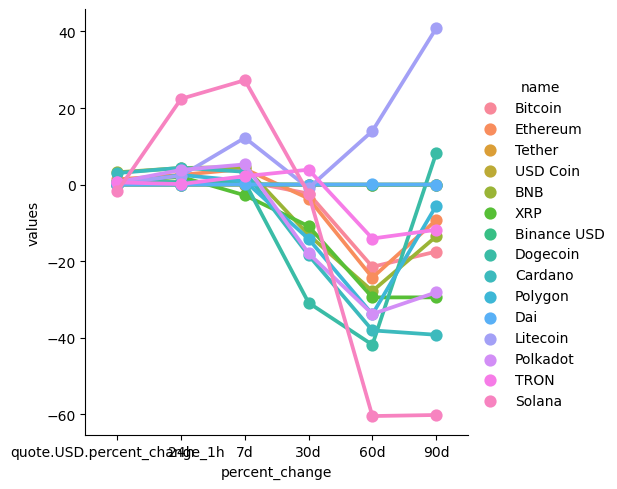

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [21]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df11 = df10.query("name == 'Binance USD'")
df11

,name,quote.USD.price,timestamp
6,Binance USD,1.00023,2023-01-04 03:47:51.189169
6,Binance USD,1.00023,2023-01-04 03:47:51.629206
